# Unsupervised Clustering

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import os

In [6]:
path = os.getcwd()

print(path)
os.chdir('C:\\bb\\airbnb')

df = pd.read_csv(".\\data\\FF_train_clean.csv")
df.head()

C:\bb\airbnb


,X,listing_id,week_num,avg_price,min_price,max_price,host_is_superhost,host_identity_verified,neighbourhood_cleansed,zipcode,...,occupied_cat,summary,space,description,neighborhood_overview,notes,transit,host_about,amenities,accommodates.norm
0,1,27267054,12,4.934474,4.934474,4.934474,t,f,Mission,94103,...,Full,"Modern dÃ©cor, King size bed, Private Entrance...",The room has been recently remodelled and ever...,"Modern dÃ©cor, King size bed, Private Entrance...","Whether here for work or leisure, this locatio...",TRAVELLING WITH FRIENDS OR CO-WORKERS? Please ...,Only three blocks to: BART - 16th Street Missi...,"Professional gay man, passionate about design,...","{TV,Wifi,""Paid parking off premises"",Heating,""...",Two
1,2,27267054,13,4.934474,4.934474,4.934474,t,f,Mission,94103,...,Low,"Modern dÃ©cor, King size bed, Private Entrance...",The room has been recently remodelled and ever...,"Modern dÃ©cor, King size bed, Private Entrance...","Whether here for work or leisure, this locatio...",TRAVELLING WITH FRIENDS OR CO-WORKERS? Please ...,Only three blocks to: BART - 16th Street Missi...,"Professional gay man, passionate about design,...","{TV,Wifi,""Paid parking off premises"",Heating,""...",Two
2,3,27267054,11,4.934474,4.934474,4.934474,t,f,Mission,94103,...,Medium,"Modern dÃ©cor, King size bed, Private Entrance...",The room has been recently remodelled and ever...,"Modern dÃ©cor, King size bed, Private Entrance...","Whether here for work or leisure, this locatio...",TRAVELLING WITH FRIENDS OR CO-WORKERS? Please ...,Only three blocks to: BART - 16th Street Missi...,"Professional gay man, passionate about design,...","{TV,Wifi,""Paid parking off premises"",Heating,""...",Two
3,4,27267054,14,4.934474,4.934474,4.934474,t,f,Mission,94103,...,Medium,"Modern dÃ©cor, King size bed, Private Entrance...",The room has been recently remodelled and ever...,"Modern dÃ©cor, King size bed, Private Entrance...","Whether here for work or leisure, this locatio...",TRAVELLING WITH FRIENDS OR CO-WORKERS? Please ...,Only three blocks to: BART - 16th Street Missi...,"Professional gay man, passionate about design,...","{TV,Wifi,""Paid parking off premises"",Heating,""...",Two
4,8,15270397,11,4.465908,4.465908,4.465908,f,t,Bernal Heights,94110,...,Full,This property is only available with a minimum...,This cozy studio suite is furnished with new m...,This property is only available with a minimum...,"BERNAL HEIGHTS. San Francisco's back yard, lov...",NaN,PUBLIC TRANSPORTATION & DISTANCES Union Square...,"I love my family, without them nothing would b...","{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",Two


In [8]:
## Remove strings

string_features = ['summary','space', 'description', 'neighborhood_overview','notes','transit','host_about','amenities']

df=df.drop(string_features, axis=1)

df['host_is_superhost'] = df['host_is_superhost'].astype('category').cat.codes
df['host_identity_verified'] = df['host_identity_verified'].astype('category').cat.codes
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes
df['zipcode'] = df['zipcode'].astype('category').cat.codes
df['instant_bookable'] = df['instant_bookable'].astype('category').cat.codes
df['cancellation_policy'] = df['cancellation_policy'].astype('category').cat.codes
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].astype('category').cat.codes
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].astype('category').cat.codes
df['occupied_cat'] = df['occupied_cat'].astype('category').cat.codes
df['is_location_exact'] = df['is_location_exact'].astype('category').cat.codes
df['property_type'] = df['property_type'].astype('category').cat.codes
df['room_type'] = df['room_type'].astype('category').cat.codes
df['bed_type'] = df['bed_type'].astype('category').cat.codes
df['bathrooms'] = df['bathrooms'].astype('category').cat.codes
df['bedrooms'] = df['bedrooms'].astype('category').cat.codes
df['beds'] = df['beds'].astype('category').cat.codes
df['security_deposit'] = df['security_deposit'].astype('category').cat.codes
df['cleaning_fee'] = df['cleaning_fee'].astype('category').cat.codes
df['guests_included'] = df['guests_included'].astype('category').cat.codes
df['extra_people'] = df['extra_people'].astype('category').cat.codes
df['minimum_nights'] = df['minimum_nights'].astype('category').cat.codes
df['maximum_nights'] = df['maximum_nights'].astype('category').cat.codes
df['number_of_reviews'] = df['number_of_reviews'].astype('category').cat.codes
df['review_scores_accuracy'] = df['review_scores_accuracy'].astype('category').cat.codes
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].astype('category').cat.codes
df['review_scores_checkin'] = df['review_scores_checkin'].astype('category').cat.codes
df['review_scores_communication'] = df['review_scores_communication'].astype('category').cat.codes
df['review_scores_location'] = df['review_scores_location'].astype('category').cat.codes
df['review_scores_value'] = df['review_scores_value'].astype('category').cat.codes
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype('category').cat.codes
df['reviews_per_month'] = df['reviews_per_month'].astype('category').cat.codes
df['accommodates.norm'] = df['accommodates.norm'].astype('category').cat.codes

In [18]:
df = df.drop(['X','listing_id'], axis=1)

In [20]:
print(df.columns)
subset = df.columns.difference(['occupied_cat'])
print(subset)

Index(['week_num', 'avg_price', 'min_price', 'max_price', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'host_seniority', 'occupied_cat',
       'accommodates.norm'],
      dtype='object')
Index(['accommodates', 'accommodates.norm', 'avg_price', 'bathrooms',
       'bed_type', 'bedrooms', 'be

In [9]:
df.describe()

,X,listing_id,week_num,avg_price,min_price,max_price,host_is_superhost,host_identity_verified,neighbourhood_cleansed,zipcode,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_seniority,occupied_cat,accommodates.norm
count,176451.000000,1.764510e+05,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,...,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000,176451.000000
mean,141791.808944,1.678403e+07,28.094111,5.078664,5.027655,5.132241,0.371707,0.542162,17.512573,17.946149,...,1.904053,0.413860,1.610328,0.049181,0.061587,2.403523,3.848536,4.092615,0.851727,3.387649
std,81934.256577,1.143380e+07,15.784268,0.705517,0.702365,0.722320,0.483262,0.498221,11.010319,7.609364,...,0.997496,0.492525,1.189348,0.216246,0.240404,1.323409,3.658218,2.472127,0.718053,1.758228
min,1.000000,9.580000e+02,1.000000,2.302585,2.302585,2.302585,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70817.500000,6.610089e+06,14.000000,4.605170,4.574711,4.653960,0.000000,0.000000,7.000000,13.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000
50%,141810.000000,1.582842e+07,28.000000,5.031371,5.003946,5.075174,0.000000,1.000000,16.000000,18.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,4.000000
75%,212740.500000,2.705665e+07,43.000000,5.517453,5.438079,5.556828,1.000000,1.000000,26.000000,23.000000,...,3.000000,1.000000,3.000000,0.000000,0.000000,3.000000,6.000000,6.000000,1.000000,5.000000
max,283544.000000,4.056928e+07,53.000000,7.600902,7.600902,9.210240,1.000000,1.000000,36.000000,41.000000,...,3.000000,1.000000,5.000000,1.000000,1.000000,5.000000,10.000000,12.000000,2.000000,5.000000


In [10]:
df.head()

,X,listing_id,week_num,avg_price,min_price,max_price,host_is_superhost,host_identity_verified,neighbourhood_cleansed,zipcode,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_seniority,occupied_cat,accommodates.norm
0,1,27267054,12,4.934474,4.934474,4.934474,1,0,16,8,...,3,1,0,0,0,1,6,4,0,5
1,2,27267054,13,4.934474,4.934474,4.934474,1,0,16,8,...,3,1,0,0,0,1,6,4,1,5
2,3,27267054,11,4.934474,4.934474,4.934474,1,0,16,8,...,3,1,0,0,0,1,6,4,2,5
3,4,27267054,14,4.934474,4.934474,4.934474,1,0,16,8,...,3,1,0,0,0,1,6,4,2,5
4,8,15270397,11,4.465908,4.465908,4.465908,0,1,1,14,...,1,0,3,0,0,2,0,10,0,5


In [11]:
df.isna().sum()

X                                   0
listing_id                          0
week_num                            0
avg_price                           0
min_price                           0
max_price                           0
host_is_superhost                   0
host_identity_verified              0
neighbourhood_cleansed              0
zipcode                             0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_re

In [13]:
df2 = df.copy()
df2['occupied_cat'] = df2['occupied_cat'].astype('category')

In [14]:
sns.pairplot(df2,hue="occupied_cat")

C:\Users\vladip\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vladip\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002855853B7B8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002855854A268> (for post_execute):


KeyboardInterrupt: 

## k-means

In [15]:
from sklearn.cluster import KMeans

In [23]:
df[subset]

,accommodates,accommodates.norm,avg_price,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,cleaning_fee,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,room_type,security_deposit,week_num,zipcode
0,2,5,4.934474,1,4,1,0,1,0,2,...,3,3,3,3,3,6,2,2,12,8
1,2,5,4.934474,1,4,1,0,1,0,2,...,3,3,3,3,3,6,2,2,13,8
2,2,5,4.934474,1,4,1,0,1,0,2,...,3,3,3,3,3,6,2,2,11,8
3,2,5,4.934474,1,4,1,0,1,0,2,...,3,3,3,3,3,6,2,2,14,8
4,2,5,4.465908,1,4,0,0,2,3,1,...,3,1,3,3,1,0,0,0,11,14
5,2,5,4.465908,1,4,0,0,2,3,1,...,3,1,3,3,1,0,0,0,14,14
6,2,5,5.010635,1,4,1,0,3,0,3,...,3,3,3,1,1,3,2,2,27,16
7,2,5,4.976734,1,4,1,2,1,2,3,...,3,3,3,3,1,3,0,3,52,11
8,2,5,5.068904,1,4,1,0,1,0,3,...,2,2,2,2,2,10,0,2,52,14
9,2,5,5.068904,1,4,1,0,1,0,3,...,2,2,2,2,2,10,0,2,50,14


In [25]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[subset])
    wcss.append(kmeans.inertia_)
    print(i)
    

2
3
4
5
6
7
8
9
10
11
12
13
14


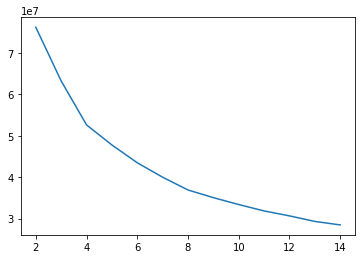

In [26]:
sns.lineplot(x=range(2, 15), y=wcss)

In [27]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df[subset])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [28]:
df2['cluster'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


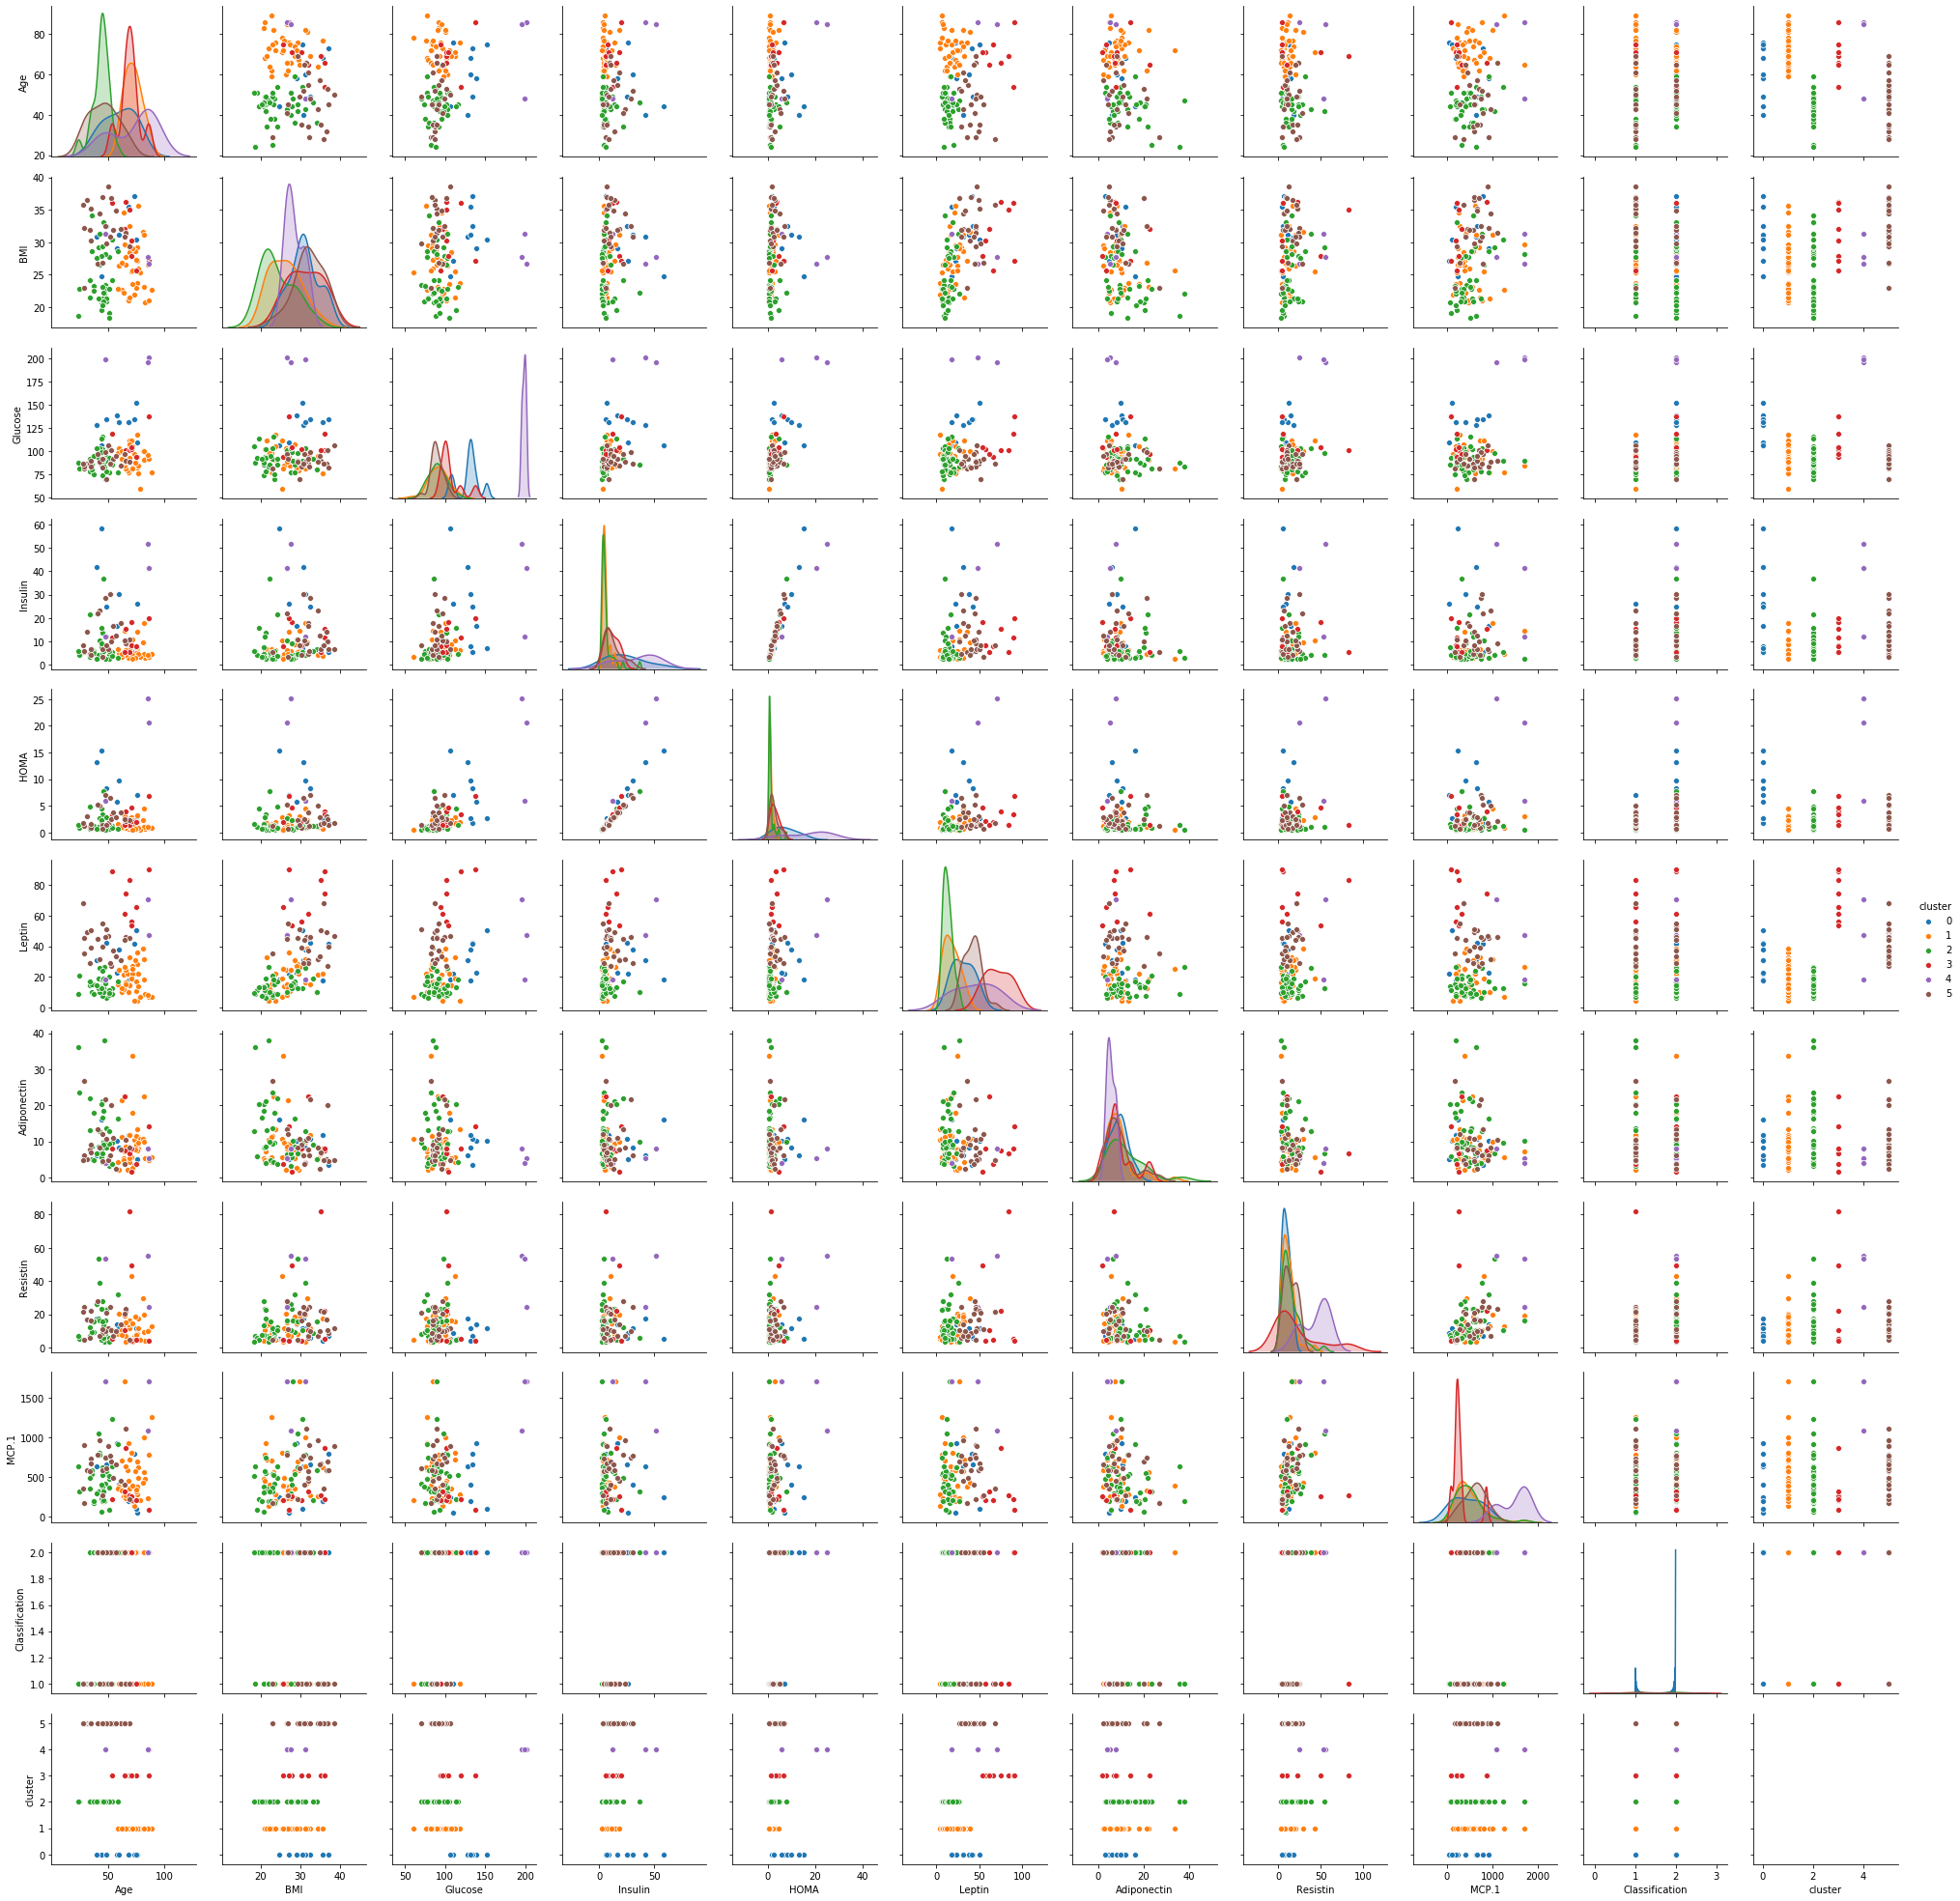

In [13]:
sns.pairplot(df2,hue="cluster")

In [29]:
pd.crosstab(df2.cluster,df2.occupied_cat)

occupied_cat,0,1,2
cluster,,,
0,16262,18404,6559
1,16466,19560,11191
2,14230,22903,6394
3,13552,20727,10203


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [32]:
linked = linkage(df[subset], 'ward')

labelList = range(2, 15)

MemoryError: 

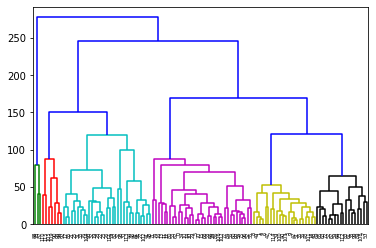

In [17]:
dn = dendrogram(linked,color_threshold=120)


In [18]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [19]:
pd.crosstab(df2.hcluster,df2.Classification)

Classification,1,2
hcluster,,
1,0,3
2,0,7
3,18,13
4,13,22
5,18,4
6,3,15


In [20]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,0,5,0,1,0,3
1,0,0,4,0,22,11
2,0,0,0,33,0,4
3,0,2,6,0,0,0
4,3,0,0,0,0,0
5,0,0,21,1,0,0


In [21]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,2.215517,4.034483
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,1.575939,1.250607
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000,3.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000,4.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,3.000000,5.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,5.000000,6.000000


In [22]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,1,5


# Partition of the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [36]:
X = df2.loc[:,nv + nc]
y = df2.Classification

In [37]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,5


In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1])

In [43]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[5.55681330e-01, 4.44318670e-01],
       [1.67359522e-01, 8.32640478e-01],
       [1.07843667e-01, 8.92156333e-01],
       [7.27856457e-02, 9.27214354e-01],
       [8.26268960e-02, 9.17373104e-01],
       [6.61934637e-01, 3.38065363e-01],
       [8.33896754e-01, 1.66103246e-01],
       [5.43806918e-01, 4.56193082e-01],
       [2.30031430e-01, 7.69968570e-01],
       [2.48855990e-05, 9.99975114e-01],
       [3.43498965e-03, 9.96565010e-01],
       [8.93202196e-01, 1.06797804e-01],
       [7.70946618e-01, 2.29053382e-01],
       [1.39138787e-02, 9.86086121e-01],
       [4.83144355e-08, 9.99999952e-01],
       [3.41983815e-01, 6.58016185e-01],
       [6.58036717e-01, 3.41963283e-01],
       [2.94714020e-01, 7.05285980e-01],
       [1.28108835e-01, 8.71891165e-01],
       [3.54123896e-01, 6.45876104e-01],
       [5.79183737e-01, 4.20816263e-01],
       [9.51450426e-01, 4.85495740e-02],
       [4.45912559e-01, 5.54087441e-01],
       [8.09456631e-01, 1.90543369e-01],
       [2.747167

In [44]:
pd.crosstab(y_train,yhat1)

col_0,1,2
Classification,,
1,22,8
2,7,32


In [45]:
### Accuracy:
mod1.score(X_train,y_train)

0.782608695652174

In [46]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

0.776923076923077


NameError: name 'yhat2' is not defined

In [47]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.6595744680851063


col_0,1,2
Classification,,
1,9,13
2,3,22


In [48]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [49]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.782608695652174,
  'accuracy-Test': 0.6595744680851063,
  'AUC-train': 0.776923076923077,
  'AUC-test': 0.6445454545454545}}

In [ ]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [ ]:
res